Task 1:
Create a brute-force algorithm to crack the SHA-512 hash.


In [4]:
%%time
import string
import itertools
import hashlib

hashes = [
    'f14aae6a0e050b74e4b7b9a5b2ef1a60ceccbbca39b132ae3e8bf88d3a946c6d8687f3266fd2b626419d8b67dcf1d8d7c0fe72d4919d9bd05efbd37070cfb41a', 
    'e85e639da67767984cebd6347092df661ed79e1ad21e402f8e7de01fdedb5b0f165cbb30a20948f1ba3f94fe33de5d5377e7f6c7bb47d017e6dab6a217d6cc24', 
    '4e2589ee5a155a86ac912a5d34755f0e3a7d1f595914373da638c20fecd7256ea1647069a2bb48ac421111a875d7f4294c7236292590302497f84f19e7227d80', 
    'afd66cdf7114eae7bd91da3ae49b73b866299ae545a44677d72e09692cdee3b79a022d8dcec99948359e5f8b01b161cd6cfc7bd966c5becf1dff6abd21634f4b'

]

def sha512_hash(password):
    """Return the SHA-512 hash of the given password."""
    return hashlib.sha512(password.encode('utf-8')).hexdigest()

def brute_force_decode(hashes, max_length=4):
    """Brute force algorithm encoding all possible combinations of letters and numbers up to a given length."""
    characters = string.ascii_lowercase + string.digits
    found_passwords = {}
    
    for length in range(1, max_length + 1):
        for combination in itertools.product(characters, repeat=length):
            password = ''.join(combination)
            hashed_password = sha512_hash(password)
            
            if hashed_password in hashes and hashed_password not in found_passwords:
                found_passwords[hashed_password] = password
                
                # Exit if all hashes have been found
                if len(found_passwords) == len(hashes):
                    return found_passwords
    return found_passwords


found_passwords = brute_force_decode(hashes, max_length=4)

for hashed_password, password in found_passwords.items():
    print(f"Hash: {hashed_password} | Password: {password}\n{'-' * 150}")


Hash: f14aae6a0e050b74e4b7b9a5b2ef1a60ceccbbca39b132ae3e8bf88d3a946c6d8687f3266fd2b626419d8b67dcf1d8d7c0fe72d4919d9bd05efbd37070cfb41a | Password: m
------------------------------------------------------------------------------------------------------------------------------------------------------
Hash: e85e639da67767984cebd6347092df661ed79e1ad21e402f8e7de01fdedb5b0f165cbb30a20948f1ba3f94fe33de5d5377e7f6c7bb47d017e6dab6a217d6cc24 | Password: mc
------------------------------------------------------------------------------------------------------------------------------------------------------
Hash: 4e2589ee5a155a86ac912a5d34755f0e3a7d1f595914373da638c20fecd7256ea1647069a2bb48ac421111a875d7f4294c7236292590302497f84f19e7227d80 | Password: 555
------------------------------------------------------------------------------------------------------------------------------------------------------
Hash: afd66cdf7114eae7bd91da3ae49b73b866299ae545a44677d72e09692cdee3b79a022d8dcec99948359e5f8b01b

Task 2:

In [5]:
%%time
import hashlib


def sha512_hash(password):
    """Return the SHA-512 hash of the given password."""
    return hashlib.sha512(password.encode('utf-8')).hexdigest()

    
def find_passwords_from_hashes(dictionary_file, hashes):
    # Create a dictionary of hashed passwords from the dictionary file
    with open(dictionary_file, 'r') as f:
        hash_dict = {sha512_hash(password.strip()): password.strip() for password in f}

    # Return list of passwords corresponding to the hashes or None if not found
    return [hash_dict.get(h) for h in hashes]


hashes = ['31a3423d8f8d93b92baffd753608697ebb695e4fca4610ad7e08d3d0eb7f69d75cb16d61caf7cead0546b9be4e4346c56758e94fc5efe8b437c44ad460628c70', '9381163828feb9072d232e02a1ee684a141fa9cddcf81c619e16f1dbbf6818c2edcc7ce2dc053eec3918f05d0946dd5386cbd50f790876449ae589c5b5f82762', 'a02f6423e725206b0ece283a6d59c85e71c4c5a9788351a24b1ebb18dcd8021ab854409130a3ac941fa35d1334672e36ed312a43462f4c91ca2822dd5762bd2b', '834bd9315cb4711f052a5cc25641e947fc2b3ee94c89d90ed37da2d92b0ae0a33f8f7479c2a57a32feabdde1853e10c2573b673552d25b26943aefc3a0d05699', '0ae72941b22a8733ca300161619ba9f8314ccf85f4bad1df0dc488fdd15d220b2dba3154dc8c78c577979abd514bf7949ddfece61d37614fbae7819710cae7ab', '6768082bcb1ad00f831b4f0653c7e70d9cbc0f60df9f7d16a5f2da0886b3ce92b4cc458fbf03fea094e663cb397a76622de41305debbbb203dbcedff23a10d8a', '0f17b11e84964b8df96c36e8aaa68bfa5655d3adf3bf7b4dc162a6aa0f7514f32903b3ceb53d223e74946052c233c466fc0f2cc18c8bf08aa5d0139f58157350', 'cf4f5338c0f2ccd3b7728d205bc52f0e2f607388ba361839bd6894c6fb8e267beb5b5bfe13b6e8cc5ab04c58b5619968615265141cc6a8a9cd5fd8cc48d837ec', '1830a3dfe79e29d30441f8d736e2be7dbc3aa912f11abbffb91810efeef1f60426c31b6d666eadd83bbba2cc650d8f9a6393310b84e2ef02efa9fe161bf8f41d', '3b46175f10fdb54c7941eca89cc813ddd8feb611ed3b331093a3948e3ab0c3b141ff6a7920f9a068ab0bf02d7ddaf2a52ef62d8fb3a6719cf25ec6f0061da791'
]




dictionary_file = "PasswordDictionary.txt"
passwords = find_passwords_from_hashes(dictionary_file, hashes)

# Print each hash alongside its password
for h, p in zip(hashes, passwords):
    print(f"Hash: {h}\nPassword: {p or 'Not found in dictionary'}\n{'-'*120}")


Hash: 31a3423d8f8d93b92baffd753608697ebb695e4fca4610ad7e08d3d0eb7f69d75cb16d61caf7cead0546b9be4e4346c56758e94fc5efe8b437c44ad460628c70
Password: 45678
------------------------------------------------------------------------------------------------------------------------
Hash: 9381163828feb9072d232e02a1ee684a141fa9cddcf81c619e16f1dbbf6818c2edcc7ce2dc053eec3918f05d0946dd5386cbd50f790876449ae589c5b5f82762
Password: admin$
------------------------------------------------------------------------------------------------------------------------
Hash: a02f6423e725206b0ece283a6d59c85e71c4c5a9788351a24b1ebb18dcd8021ab854409130a3ac941fa35d1334672e36ed312a43462f4c91ca2822dd5762bd2b
Password: Blessing
------------------------------------------------------------------------------------------------------------------------
Hash: 834bd9315cb4711f052a5cc25641e947fc2b3ee94c89d90ed37da2d92b0ae0a33f8f7479c2a57a32feabdde1853e10c2573b673552d25b26943aefc3a0d05699
Password: Windows10
-------------------------

Task 3


In [6]:
%%time
import hashlib

def sha512_hash_with_salt(string, salt):
    """Hashes a string combined with salt using SHA-512 and returns the hexadecimal representation."""
    return hashlib.sha512((string + salt).encode()).hexdigest()

def load_dictionary_from_file(filename):
    """Load words from a given file into a list."""
    with open(filename, 'r') as file:
        return [line.strip() for line in file]
def crack_salted_passwords(dictionary, salted_hashes):
    cracked_passwords = []

    for salted_hash_group in salted_hashes:
        for salted_hash, salt in salted_hash_group:
            found = False
            for word in dictionary:
                if sha512_hash_with_salt(word, salt) == salted_hash:
                    cracked_passwords.append((word, salted_hash, salt))
                    print(f"Hash: {salted_hash}\nSalt: {salt}\nPassword: {word}\n{'-'*150}")
                    found = True
                    break

            # If no match is found for this hash, append an indicator (optional)
            if not found:
                cracked_passwords.append((None, salted_hash, salt))
                print(f"Hash: {salted_hash}\nSalt: {salt}\nPassword: NOT FOUND\n{'-'*120}")

    return cracked_passwords





salted_hashes = [
    [('63328352350c9bd9611497d97fef965bda1d94ca15cc47d5053e164f4066f546828eee451cb5edd6f2bba1ea0a82278d0aa76c7003c79082d3a31b8c9bc1f58b',
  'dbc3ab99'),
 ('86ed9024514f1e475378f395556d4d1c2bdb681617157e1d4c7d18fb1b992d0921684263d03dc4506783649ea49bc3c9c7acf020939f1b0daf44adbea6072be6',
  'fa46510a'),
 ('16ac21a470fb5164b69fc9e4c5482e447f04f67227102107ff778ed76577b560f62a586a159ce826780e7749eadd083876b89de3506a95f51521774fff91497e',
  '9e8dc114'),
 ('13ef55f6fdfc540bdedcfafb41d9fe5038a6c52736e5b421ea6caf47ba03025e8d4f83573147bc06f769f8aeba0abd0053ca2348ee2924ffa769e393afb7f8b5',
  'c202aebb'),
 ('9602a9e9531bfb9e386c1565ee733a312bda7fd52b8acd0e51e2a0a13cce0f43551dfb3fe2fc5464d436491a832a23136c48f80b3ea00b7bfb29fedad86fc37a',
  'd831c568'),
 ('799ed233b218c9073e8aa57f3dad50fbf2156b77436f9dd341615e128bb2cb31f2d4c0f7f8367d7cdeacc7f6e46bd53be9f7773204127e14020854d2a63c6c18',
  '86d01e25'),
 ('7586ee7271f8ac620af8c00b60f2f4175529ce355d8f51b270128e8ad868b78af852a50174218a03135b5fc319c20fcdc38aa96cd10c6e974f909433c3e559aa',
  'a3582e40'),
 ('8522d4954fae2a9ad9155025ebc6f2ccd97e540942379fd8f291f1a022e5fa683acd19cb8cde9bd891763a2837a4ceffc5e89d1a99b5c45ea458a60cb7510a73',
  '6f966981'),
 ('6f5ad32136a430850add25317336847005e72a7cfe4e90ce9d86b89d87196ff6566322d11c13675906883c8072a66ebe87226e2bc834ea523adbbc88d2463ab3',
  '894c88a4'),
 ('21a60bdd58abc97b1c3084ea8c89aeaef97d682c543ff6edd540040af20b5db228fbce66fac962bdb2b2492f40dd977a944f1c25bc8243a4061dfeeb02ab721e',
  '4c8f1a45')
]

]
# Load the password dictionary from the file
password_dictionary = load_dictionary_from_file("PasswordDictionary.txt")


# Crack the passwords
cracked_passwords = crack_salted_passwords(password_dictionary, salted_hashes)
print(cracked_passwords)

Hash: 63328352350c9bd9611497d97fef965bda1d94ca15cc47d5053e164f4066f546828eee451cb5edd6f2bba1ea0a82278d0aa76c7003c79082d3a31b8c9bc1f58b
Salt: dbc3ab99
Password: M$T$C123
------------------------------------------------------------------------------------------------------------------------------------------------------
Hash: 86ed9024514f1e475378f395556d4d1c2bdb681617157e1d4c7d18fb1b992d0921684263d03dc4506783649ea49bc3c9c7acf020939f1b0daf44adbea6072be6
Salt: fa46510a
Password: Hetzneronline!@1234
------------------------------------------------------------------------------------------------------------------------------------------------------
Hash: 16ac21a470fb5164b69fc9e4c5482e447f04f67227102107ff778ed76577b560f62a586a159ce826780e7749eadd083876b89de3506a95f51521774fff91497e
Salt: 9e8dc114
Password: Server!@#$
------------------------------------------------------------------------------------------------------------------------------------------------------
Hash: 13ef55f6fdfc540bdedcf

**Task 4: Mini project**


**Work on these tasks and compare them in language Rust**


In [7]:
import string
import itertools
import hashlib
import time
import random
import statistics
import matplotlib.pyplot as plt
import csv

def generate_random_password(length):
    characters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(characters) for _ in range(length))

def sha512_hash(password):
    return hashlib.sha512(password.encode('utf-8')).hexdigest()

def brute_force_decode_for_length(hash_val, target_length):
    characters = string.ascii_lowercase + string.digits
    for combination in itertools.product(characters, repeat=target_length):
        password = ''.join(combination)
        if sha512_hash(password) == hash_val:
            return password
    return None

def time_brute_force_for_length(hash_val, target_length, runs=10):
    times = []
    for _ in range(runs):
        start_time = time.time()
        _ = brute_force_decode_for_length(hash_val, target_length)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    avg_time = statistics.mean(times)
    std_time = statistics.stdev(times)
    return avg_time, std_time

runs = 10
hashes_per_length = 5

# Open the CSV file for writing
with open('results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Length", "Password", "Hash", "Average Time", "Standard Deviation"])

    for length in range(1, 6):
        for _ in range(hashes_per_length):
            random_password = generate_random_password(length)
            hash_val = sha512_hash(random_password)
            avg_time, std_time = time_brute_force_for_length(hash_val, length, runs=runs)

            # Write the results for each hash to the CSV
            writer.writerow([length, random_password, hash_val, avg_time, std_time])

            print(f"\nResults for length {length}:")
            print('-' * 150)
            print(f"Original password: {random_password}")
            print(f"Hash: {hash_val}")
            print(f"Average time taken over {runs} runs for length {length}: {avg_time:.6f} seconds")
            print(f"Standard deviation over {runs} runs for length {length}: {std_time:.6f} seconds")
            print('-' * 150)

# Plotting the results (averaged over all hashes for each length)
lengths = list(range(1,6 ))
avg_times_avg = [statistics.mean(avg_times[i:i+hashes_per_length]) for i in range(0, len(avg_times), hashes_per_length)]
std_times_avg = [statistics.mean(std_times[i:i+hashes_per_length]) for i in range(0, len(std_times), hashes_per_length)]
print(lengths)
print(avg_times_avg)
plt.errorbar(lengths, avg_times_avg, yerr=std_times_avg, fmt='-o', capsize=5)
plt.xlabel('Password Length')
plt.ylabel('Time (seconds)')
plt.title('Brute Force Timing Analysis Python')
plt.grid(True)
plt.show()





Results for length 1:
------------------------------------------------------------------------------------------------------------------------------------------------------
Original password: n
Hash: 917148ec47923f2e0e3d73142ac4f94ec4c73078865ba6d29f0ea172cd6f4bf34db699af5c33535d3694d4aef91a11f916004d0382f794448a8550623d34c985
Average time taken over 10 runs for length 1: 0.000019 seconds
Standard deviation over 10 runs for length 1: 0.000002 seconds
------------------------------------------------------------------------------------------------------------------------------------------------------

Results for length 1:
------------------------------------------------------------------------------------------------------------------------------------------------------
Original password: 6
Hash: 3c9ad55147a7144f6067327c3b82ea70e7c5426add9ceea4d07dc2902239bf9e049b88625eb65d014a7718f79354608cab0921782c643f0208983fffa3582e40
Average time taken over 10 runs for length 1: 0.000042 seconds


KeyboardInterrupt: 

Average time for Results.csv[Python]

In [ ]:

data = [
    (1, 6.210803985595703e-05),
    (1, 7.236003875732422e-05),
    (1, 3.457069396972656e-05),
    (1, 7.450580596923828e-05),
    (1, 6.592273712158203e-05),
    (2, 0.00042748451232910156),
    (2, 0.0019276142120361328),
    (2, 0.0008800029754638672),
    (2, 0.001412034034729004),
    (2, 0.0016380548477172852),
    (3, 0.028897404670715332),
    (3, 0.03522539138793945),
    (3, 0.05299091339111328),
    (3, 0.03963935375213623),
    (3, 0.01433706283569336),
    (4, 0.523748517036438),
    (4, 1.1707051992416382),
    (4, 1.8037068843841553),
    (4, 0.3505570888519287),
    (4, 0.4294416904449463),
    (5, 74.1040563583374),
    (5, 32.24832034111023),
    (5, 57.29303550720215),
    (5, 1.497757077217102),
    (5, 24.259512424468994)
]

averages = {}

for length, time in data:
    if length in averages:
        averages[length].append(time)
    else:
        averages[length] = [time]

for length, times in averages.items():
    avg_time = sum(times) / len(times)
    print(f"Average time for length {length}: {avg_time:.6f} seconds")


Average time for length 1: 0.000062 seconds
Average time for length 2: 0.001257 seconds
Average time for length 3: 0.034218 seconds
Average time for length 4: 0.855632 seconds
Average time for length 5: 37.880536 seconds


Rust Average time

In [ ]:
data = [
    (1, 0.0000031293),
    (1, 0.000009295700000000001),
    (1, 0.0000051874),
    (2, 0.000150629),
    (2, 0.00015493340000000003),
    (2, 0.00030521670000000005),
    (3, 0.0099213583),
    (3, 0.00665695),
    (3, 0.0031107582),
    (4, 0.2041281499),
    (4, 0.5365680583),
    (4, 0.5712043707000001),
    (5, 5.3696222502),
    (5, 3.1839063332000004),
    (5, 19.330448124999997)
]

averages = {}

for length, time in data:
    if length in averages:
        averages[length].append(time)
    else:
        averages[length] = [time]

for length, times in averages.items():
    avg_time = sum(times) / len(times)
    print(f"Average time for length {length}: {avg_time:.6f} seconds")


Average time for length 1: 0.000006 seconds
Average time for length 2: 0.000204 seconds
Average time for length 3: 0.006563 seconds
Average time for length 4: 0.437300 seconds
Average time for length 5: 9.294659 seconds


Average time taken for 10 hashes: 0.010864 seconds
Standard deviation for 10 hashes: 0.000351 seconds
Average time taken for 100 hashes: 0.010427 seconds
Standard deviation for 100 hashes: 0.000701 seconds
Average time taken for 1000 hashes: 0.010821 seconds
Standard deviation for 1000 hashes: 0.001034 seconds


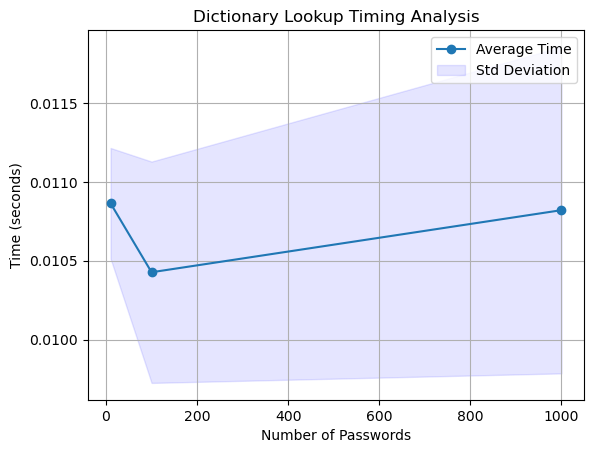

In [ ]:
import time
import hashlib
import matplotlib.pyplot as plt
import random
import csv
import statistics

def sha512_hash(password):
    """Return the SHA-512 hash of the given password."""
    return hashlib.sha512(password.encode('utf-8')).hexdigest()

def find_passwords_from_hashes(dictionary_file, hashes):
    with open(dictionary_file, 'r') as f:
        hash_dict = {sha512_hash(password.strip()): password.strip() for password in f}
    return [hash_dict.get(h) for h in hashes]

def generate_random_hashes_from_dictionary(dictionary_file, num_passwords):
    with open(dictionary_file, 'r') as f:
        all_passwords = [password.strip() for password in f]
        
    selected_passwords = random.sample(all_passwords, num_passwords)
    return [sha512_hash(password) for password in selected_passwords], selected_passwords

def time_dictionary_lookup(dictionary_file, hashes, runs=10):
    times = []
    for _ in range(runs):
        start_time = time.time()
        _ = find_passwords_from_hashes(dictionary_file, hashes)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    avg_time = statistics.mean(times)
    std_time = statistics.stdev(times)
    return avg_time, std_time

dictionary_file = "PasswordDictionary.txt"
password_lengths = [10, 100, 1000]
avg_times = []
std_times = []

# Open the CSV file for writing
with open('dictionary.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Number of Passwords", "Average Time (seconds)", "Standard Deviation (seconds)", "Password", "Hash"])

    for length in password_lengths:
        hashes, passwords = generate_random_hashes_from_dictionary(dictionary_file, length)
        avg_time, std_time = time_dictionary_lookup(dictionary_file, hashes)
        avg_times.append(avg_time)
        std_times.append(std_time)
        
        for password, hash_val in zip(passwords, hashes):
            # Write the results to the CSV
            writer.writerow([length, avg_time, std_time, password, hash_val])
        
        print(f"Average time taken for {length} hashes: {avg_time:.6f} seconds")
        print(f"Standard deviation for {length} hashes: {std_time:.6f} seconds")

# Plotting the results
plt.plot(password_lengths, avg_times, '-o', label='Average Time')
plt.fill_between(password_lengths, [avg - std for avg, std in zip(avg_times, std_times)], 
                 [avg + std for avg, std in zip(avg_times, std_times)], color='blue', alpha=0.1, label='Std Deviation')
plt.xlabel('Number of Passwords')
plt.ylabel('Time (seconds)')
plt.title('Dictionary Lookup Timing Analysis')
plt.legend()
plt.grid(True)
plt.show()


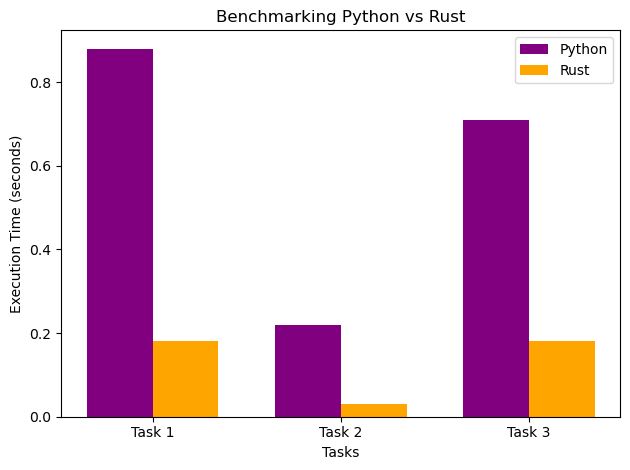

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
tasks = ["Task 1", "Task 2", "Task 3"]
python_times = [ 0.88, 0.22, 0.71]
rust_times = [0.18, 0.03, 0.18]

# Setting up the bar positions
bar_width = 0.35
index = np.arange(len(tasks))

# Creating the bar plots
bar1 = plt.bar(index, python_times, bar_width, label='Python', color='purple')
bar2 = plt.bar(index + bar_width, rust_times, bar_width, label='Rust', color='orange')

# Labeling the bars
plt.xlabel('Tasks')
plt.ylabel('Execution Time (seconds)')
plt.title('Benchmarking Python vs Rust')
plt.xticks(index + bar_width / 2, tasks) 
plt.legend()

# Displaying the plot
plt.tight_layout()
